CODE BLOCK: 1

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from model import Net
import utils

CODE BLOCK: 2

In [40]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

device = torch.device("cuda" if cuda else "cpu")#define device
device

CUDA Available? False


device(type='cpu')

CODE BLOCK: 3

In [41]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [42]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [43]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

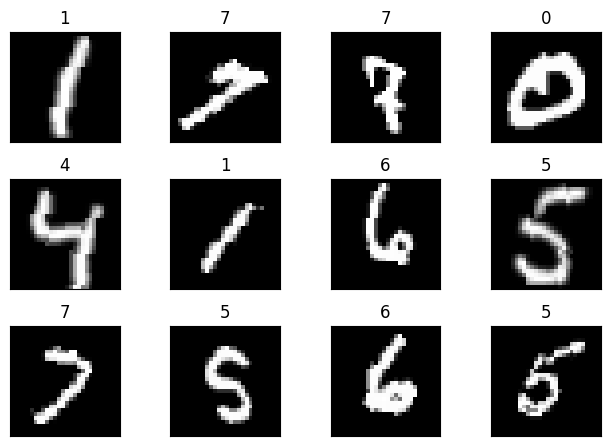

In [44]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

CODE BLOCK: 8

CODE BLOCK: 9

CODE BLOCK: 10

In [48]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  utils.train(model, device, train_loader, optimizer, criterion)
  utils.test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.1659 Batch_id=117 Accuracy=36.26: 100%|██████████| 118/118 [04:30<00:00,  2.29s/it]


Test set: Average loss: 0.8993, Accuracy: 7607/10000 (76.07%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2193 Batch_id=117 Accuracy=90.11: 100%|██████████| 118/118 [04:36<00:00,  2.35s/it]


Test set: Average loss: 0.1084, Accuracy: 9668/10000 (96.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.2154 Batch_id=117 Accuracy=95.70: 100%|██████████| 118/118 [04:33<00:00,  2.32s/it]


Test set: Average loss: 0.0724, Accuracy: 9770/10000 (97.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1132 Batch_id=117 Accuracy=96.92: 100%|██████████| 118/118 [04:41<00:00,  2.39s/it]


Test set: Average loss: 0.0502, Accuracy: 9843/10000 (98.43%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0296 Batch_id=117 Accuracy=97.33: 100%|██████████| 118/118 [04:35<00:00,  2.33s/it]


Test set: Average loss: 0.0460, Accuracy: 9861/10000 (98.61%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1130 Batch_id=117 Accuracy=97.65: 100%|██████████| 118/118 [04:42<00:00,  2.39s/it]


Test set: Average loss: 0.0535, Accuracy: 9823/10000 (98.23%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0643 Batch_id=117 Accuracy=97.95: 100%|██████████| 118/118 [04:32<00:00,  2.31s/it]


Test set: Average loss: 0.0367, Accuracy: 9875/10000 (98.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1128 Batch_id=117 Accuracy=98.15: 100%|██████████| 118/118 [04:39<00:00,  2.37s/it]


Test set: Average loss: 0.0320, Accuracy: 9897/10000 (98.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0391 Batch_id=117 Accuracy=98.30: 100%|██████████| 118/118 [04:36<00:00,  2.34s/it]


Test set: Average loss: 0.0353, Accuracy: 9884/10000 (98.84%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0347 Batch_id=117 Accuracy=98.38: 100%|██████████| 118/118 [04:28<00:00,  2.28s/it]


Test set: Average loss: 0.0382, Accuracy: 9879/10000 (98.79%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.1246 Batch_id=117 Accuracy=98.40: 100%|██████████| 118/118 [04:34<00:00,  2.32s/it]


Test set: Average loss: 0.0341, Accuracy: 9879/10000 (98.79%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0153 Batch_id=117 Accuracy=98.52: 100%|██████████| 118/118 [04:22<00:00,  2.22s/it]


Test set: Average loss: 0.0259, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0155 Batch_id=117 Accuracy=98.71: 100%|██████████| 118/118 [04:08<00:00,  2.10s/it]


Test set: Average loss: 0.0242, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0282 Batch_id=117 Accuracy=98.75: 100%|██████████| 118/118 [04:12<00:00,  2.14s/it]


Test set: Average loss: 0.0275, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0235 Batch_id=117 Accuracy=98.82: 100%|██████████| 118/118 [04:12<00:00,  2.14s/it]


Test set: Average loss: 0.0250, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0413 Batch_id=117 Accuracy=99.07: 100%|██████████| 118/118 [04:11<00:00,  2.14s/it]


Test set: Average loss: 0.0208, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0089 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [04:14<00:00,  2.15s/it]


Test set: Average loss: 0.0203, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0102 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [04:19<00:00,  2.20s/it]


Test set: Average loss: 0.0202, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0594 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [04:15<00:00,  2.16s/it]


Test set: Average loss: 0.0207, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0226 Batch_id=117 Accuracy=99.05: 100%|██████████| 118/118 [04:17<00:00,  2.18s/it]


Test set: Average loss: 0.0209, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

Text(0.5, 1.0, 'Test Accuracy')

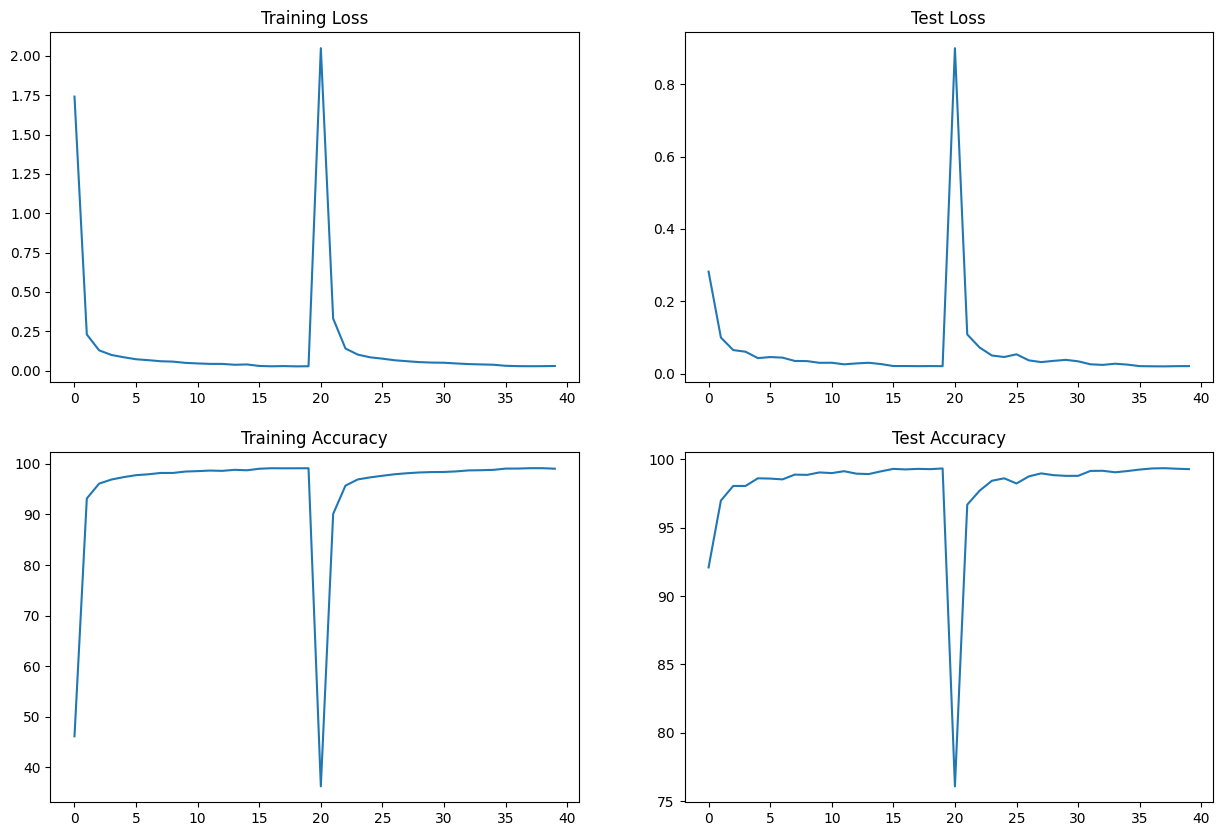

In [52]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(utils.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(utils.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(utils.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(utils.test_acc)
axs[1, 1].set_title("Test Accuracy")

CODE BLOCK: 12

In [53]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
